## Тема “Обучение без учителя”

### Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.\
Загрузите "Boston House Prices dataset" из встроенных наборов
данных библиотеки sklearn.\
Создайте датафреймы X и y из этих данных.\
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.\
Масштабируйте данные с помощью StandardScaler.\
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.\
Постройте диаграмму рассеяния на этих данных.

In [392]:
# Импортируйте библиотеки pandas, numpy и matplotlib.

import pandas as pd
import numpy as np
import matplotlib as mpl

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
boston = load_boston()

In [393]:
# Создайте датафреймы X и y из этих данных.

data = boston.data
price = boston.target

In [394]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [413]:
price[:50]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4])

In [396]:
# Создайте датафреймы X и y из этих данных.

X = pd.DataFrame(data, columns=boston.feature_names)
y = pd.DataFrame(price, columns=['price'])

In [397]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [398]:
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [399]:
# Разбейте эти датафреймы на ТРЕНИРОВОЧНЫЕ(X_train, y_train) и ТЕСТОВЫЕ(X_test, y_test)
# с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных,
# при этом аргумент random_state должен быть равен 42.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404, 1), (102, 1))

In [400]:
# Масштабируйте данные с помощью StandardScaler.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# (так красивей)
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=boston.feature_names)
X_train_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787


In [401]:
# Постройте модель tSNE на тренировочных данных с параметрами: n_components=2, learning_rate=250, random_state=42.

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)
print(X_train_tsne)

C:\Users\SAMOL\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[[ 1.81041489e+01  2.91841412e+01]
 [ 3.36446118e+00 -7.90966845e+00]
 [-2.07167511e+01 -8.94725513e+00]
 [ 2.76545868e+01  2.66364594e+01]
 [ 4.35941935e+00 -7.43922949e+00]
 [-1.18708668e+01 -3.19696522e+00]
 [-9.88421822e+00 -3.11915612e+00]
 [-2.67814331e+01 -1.50311155e+01]
 [ 2.85059834e+01  2.74729290e+01]
 [ 2.97867966e+01  2.44989853e+01]
 [-1.03291616e+01 -2.70374441e+00]
 [-6.06545353e+00 -9.15262985e+00]
 [-5.61790419e+00 -1.35841761e+01]
 [ 2.86210976e+01  2.46200790e+01]
 [-7.11505461e+00 -1.45416355e+01]
 [ 7.49843025e+00 -8.60527611e+00]
 [ 1.22831607e+00 -5.80473423e+00]
 [-2.18536625e+01 -8.58939934e+00]
 [-1.68641014e+01 -1.03258257e+01]
 [-1.86876888e+01 -6.71250486e+00]
 [ 2.41089859e+01  2.88961773e+01]
 [-7.64432192e-01 -5.37148428e+00]
 [-1.35651073e+01 -3.63450623e+00]
 [-8.29061127e+00 -4.92048645e+00]
 [-2.71355915e+01 -1.48728647e+01]
 [-6.49560738e+00 -1.29633284e+01]
 [-7.80653834e-01  8.48422623e+00]
 [-8.23790169e+00 -1.67715759e+01]
 [ 1.02396154e+01  2

In [325]:
print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


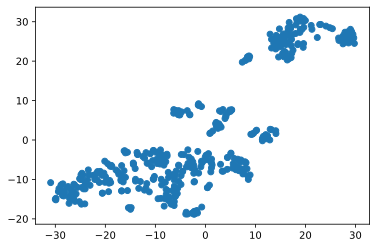

In [414]:
# Постройте диаграмму рассеяния на этих данных.

import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1])

### Задание 2

С помощью KMeans разбейте данные из ТРЕНИРОВОЧНОГО набора на 3 кластера,
используйте все признаки из датафрейма X_train.\
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.\
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.\
Вычислите средние значения price и CRIM в разных кластерах.

In [419]:
# С помощью KMeans разбейте данные из ТРЕНИРОВОЧНОГО набора на 3 кластера, используйте все признаки из датафрейма X_train.
# Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

from sklearn.cluster import KMeans

k_mean = KMeans(n_clusters=3, max_iter=100, random_state=42)

X_train_cluster = k_mean.fit_predict(X_train_scaled)
print(X_train_cluster)

[1 2 0 1 2 2 2 0 1 1 2 2 2 1 2 2 2 0 2 0 1 2 0 2 0 2 1 0 2 0 2 2 1 1 2 0 0
 2 2 0 0 2 1 2 1 1 2 2 1 1 2 2 2 2 1 1 2 1 2 2 2 2 2 2 2 1 2 2 1 2 2 2 1 2
 2 2 0 2 1 1 1 1 0 2 1 1 1 0 1 2 2 1 1 0 0 2 1 1 2 1 2 0 0 0 2 2 0 2 2 2 1
 0 2 0 0 1 1 1 2 2 2 1 1 2 0 1 1 0 0 1 0 2 2 2 2 1 2 0 2 1 2 1 2 2 2 1 2 2
 2 2 2 1 0 2 0 1 1 1 1 1 0 2 1 2 1 0 0 2 0 2 2 0 0 1 0 0 1 1 0 2 2 2 1 2 1
 1 0 0 1 1 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 0 2 2 2 2 0 2 1 2 1 0 1 2 1 1 1
 1 2 2 0 0 2 0 2 1 2 2 2 2 2 1 1 0 2 2 0 0 1 1 2 0 1 1 2 0 0 1 2 0 1 2 2 1
 2 1 2 2 0 2 2 2 2 2 2 0 1 2 1 2 2 0 2 1 1 0 1 2 1 2 2 1 0 0 2 1 0 1 1 1 2
 0 1 2 2 2 2 2 2 1 0 2 1 0 0 2 0 2 0 2 1 0 2 2 2 0 1 2 1 1 2 1 0 2 2 1 2 1
 1 2 2 1 0 2 2 0 2 2 2 1 2 2 2 2 1 2 1 2 0 0 1 0 1 2 1 0 2 1 0 2 0 2 0 2 0
 2 2 1 2 0 1 0 1 2 1 0 2 2 1 2 1 1 2 1 2 1 2 2 1 2 2 2 0 2 2 2 0 1 2]


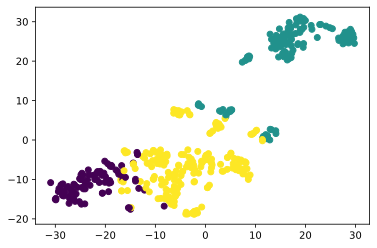

In [420]:
# Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
# и раскрасьте точки из разных кластеров разными цветами.


plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=X_train_cluster)
plt.show()

In [405]:
print('Средние значения price:')
print('Кластер 0: {}'.format(y_train[cluster_train == 0].mean()))
print('Кластер 1: {}'.format(y_train[cluster_train == 1].mean()))
print('Кластер 2: {}'.format(y_train[cluster_train == 2].mean()))

Средние значения price:
Кластер 0: price    27.788372
dtype: float64
Кластер 1: price    16.165354
dtype: float64
Кластер 2: price    24.958115
dtype: float64


In [406]:
# Вычислите средние значения price в разных кластерах(другой способ).
print('Первый кластер:', y_train[cluster_train == 0].mean())
print('Второй кластер:', y_train[cluster_train == 1].mean())
print('Третий кластер:', y_train[cluster_train == 2].mean())

Первый кластер: price    27.788372
dtype: float64
Второй кластер: price    16.165354
dtype: float64
Третий кластер: price    24.958115
dtype: float64


In [407]:
# Вычислите средние значения  CRIM в разных кластерах.
print('Средние значения CRIM:')
print('Кластер 0: {}'.format(X_train.loc[cluster_train == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_train.loc[cluster_train == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_train.loc[cluster_train == 2, 'CRIM'].mean()))

Средние значения CRIM:
Кластер 0: 0.07356558139534886
Кластер 1: 10.797028425196853
Кластер 2: 0.42166020942408367


In [408]:
# Вычислите средние значения  CRIM в разных кластерах.(другой способ)
print('Первый кластер:', X_train['CRIM'][cluster_train == 0].mean())
print('Второй кластер:', X_train['CRIM'][cluster_train == 1].mean())
print('Третий кластер:', X_train['CRIM'][cluster_train == 2].mean())

Первый кластер: 0.07356558139534886
Второй кластер: 10.797028425196853
Третий кластер: 0.42166020942408367


### *Задание 3

Примените модель KMeans, построенную в предыдущем задании,
к данным из ТЕСТОВОГО набора.\
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [384]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_test_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.396809,-0.500320,-1.007111,-0.278089,-0.395412,0.141282,0.555916,-0.545853,-0.507797,-0.650926,-0.771951,0.428872,-0.481210
1,-0.400796,1.229499,-0.664391,3.595975,-0.931315,0.623942,-1.275254,0.126565,-0.624360,-0.903989,-0.322703,0.444180,-1.257094
2,-0.395234,-0.500320,2.433163,-0.278089,0.446720,-0.469805,1.081663,-0.911447,-0.624360,1.849573,0.800418,0.369934,0.790338
3,-0.396825,-0.500320,-0.025421,-0.278089,-1.220532,-0.354079,-2.172957,0.694876,-0.624360,-0.596698,0.396095,0.378682,-0.976875
4,0.167084,-0.500320,1.033237,-0.278089,1.331384,-0.026661,0.831307,-0.676503,1.706891,1.578434,0.845343,0.315043,0.677687
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,1.715000,-0.500320,1.033237,-0.278089,0.344643,-2.382098,1.124581,-1.059057,1.706891,1.578434,0.845343,-3.580942,3.085604
98,1.219719,-0.500320,1.033237,-0.278089,1.561057,0.204790,0.884955,-0.848260,1.706891,1.578434,0.845343,-3.595156,0.787522
99,1.177967,-0.500320,1.033237,-0.278089,0.344643,0.481403,1.124581,-1.071460,1.706891,1.578434,0.845343,-3.512491,1.233902
100,-0.401311,-0.500320,-0.943214,-0.278089,-0.914302,-0.424644,-0.838921,0.290806,-0.740922,-0.946166,0.081621,0.434230,0.056698


In [421]:
# Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.(X_test, y_test)

X_test_cluster = k_mean.fit_predict(X_test_scaled)
print(X_test_cluster)

[1 0 2 1 2 1 1 2 2 1 1 1 2 1 1 2 1 2 0 2 1 0 1 1 2 2 1 2 1 1 1 1 2 2 2 2 1
 1 1 1 1 1 0 1 1 2 1 1 2 1 1 0 1 1 0 2 2 0 1 1 0 0 1 1 0 1 2 1 0 2 1 2 2 0
 1 2 1 0 2 2 1 2 0 2 1 1 2 1 1 1 1 2 1 1 2 1 2 2 2 2 1 1]


In [416]:
X_test_tsne = tsne.fit_transform(X_test_scaled)
X_test_tsne

C:\Users\SAMOL\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


array([[ 5.0197625 ,  3.5026448 ],
       [ 7.4992414 ,  0.6893409 ],
       [-1.193172  ,  1.2747434 ],
       [ 4.274786  ,  6.853519  ],
       [-3.2838748 , -0.6359859 ],
       [ 3.3329237 ,  4.375684  ],
       [ 3.3225222 ,  2.661191  ],
       [-0.2720887 ,  1.5618173 ],
       [-2.4586935 , -0.9269524 ],
       [ 2.569183  ,  2.9838974 ],
       [ 6.657275  , -0.10474753],
       [ 5.617243  ,  2.575429  ],
       [-6.4987187 , -1.3462882 ],
       [ 3.622064  ,  5.095051  ],
       [ 3.7266376 ,  3.817391  ],
       [-2.3100836 , -0.34536052],
       [ 0.73639625,  1.7580041 ],
       [-4.894347  , -1.8134887 ],
       [ 8.9870615 ,  6.4316616 ],
       [-3.620998  , -0.5876658 ],
       [ 5.913715  ,  6.140921  ],
       [ 6.8728104 ,  5.9980254 ],
       [ 2.79296   ,  1.8646281 ],
       [ 2.0444195 ,  3.8840384 ],
       [-3.9249754 , -0.5978049 ],
       [-3.7486129 , -1.4812883 ],
       [ 3.8003209 ,  5.911325  ],
       [-6.0818    ,  0.49802577],
       [ 6.7039065 ,

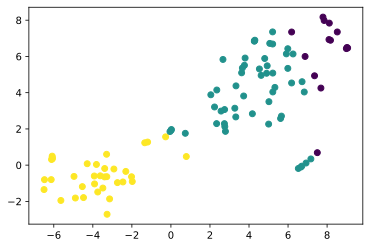

In [422]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=X_test_cluster)
plt.show()

In [423]:
print('Первый кластер:', X_test['CRIM'][X_test_cluster == 0].mean())
print('Второй кластер:', X_test['CRIM'][X_test_cluster == 1].mean())
print('Третий кластер:', X_test['CRIM'][X_test_cluster == 2].mean())

Первый кластер: 0.08618571428571427
Второй кластер: 0.25200716981132076
Третий кластер: 10.165531142857143
